In [ ]:
'''
Findings:
1. multilineariy with fee1 and fee2. Consider dropping one.
2. total and X.sales are heavily right skewed.
   a. log transform before normalizing
   b. if still bad remove these outliers
3. TODO: Seems to be an inverse relationship with all variables and total.
   See if there is some feature engineering that can be build on this.
'''

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.creation import CyclicalTransformer
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

In [340]:
# Load CSV to Dataframe
PATH = '../data/'
FILE = 'XYtr.csv'
df_train = pd.read_csv(PATH + FILE)


-1.2808341338622807e-17
1.000075117370998


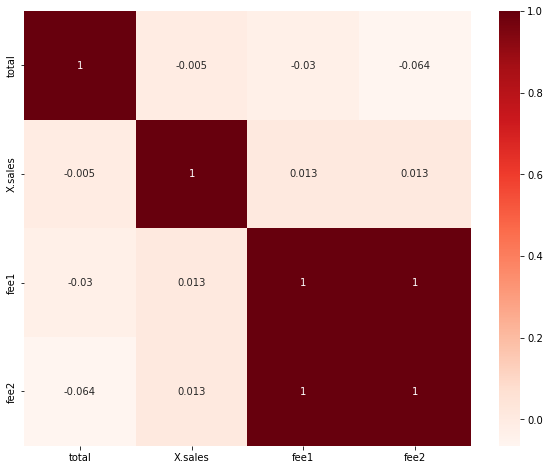

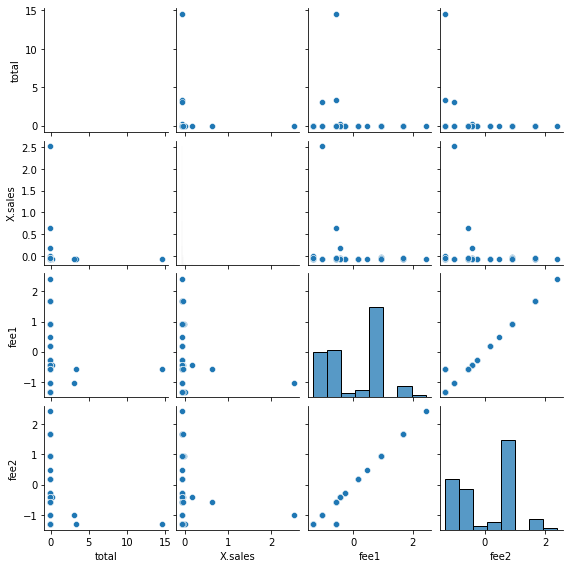

In [341]:
df_numeric = df_train[['total', 'X.sales', 'fee1', 'fee2']].copy()
df_numeric = df_numeric.dropna()
scaler = StandardScaler()
df_numeric[df_numeric.columns] = scaler.fit_transform(df_numeric[df_numeric.columns])
print(df_numeric['total'].mean())
print(df_numeric['total'].std())

plt.figure(figsize=(10,8))
cor = df_numeric.corr(method = 'pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

sns.pairplot(df_numeric.sample(n = 110, random_state=1), height = 2)

In [342]:
# There are many observations > 4 SD from the mean. 
# Consider a log transformation on both before normalizing
# For target, see TransformedtargetRegressor

print(len(df_numeric))
df_numeric = df_numeric[df_numeric['total'] < 4]
df_numeric = df_numeric[df_numeric['X.sales'] < 4]
print(len(df_numeric))

# plt.subplot(121)
# plt.hist(df_numeric['total'], bins=len(df_numeric))

# plt.subplot(122)
# plt.hist(df_numeric['X.sales'], bins=len(df_numeric))

# plt.show()

6657
6589


In [343]:
df_dates = df_train[['cdate', 'total', 'X.sales']].copy()
df_dates['cdate'] = df_dates['cdate'].astype('datetime64[ns]')
df_dates = df_dates.sort_values(by='cdate').reset_index(drop=True)

df_dates.head()

,cdate,total,X.sales
0,2019-04-26,0.055,1
1,2019-04-26,0.650,4
2,2019-04-26,0.050,2
3,2019-04-26,0.090,2
4,2019-04-26,0.090,1


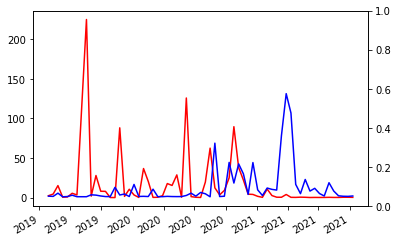

In [344]:
df_dates = df_dates.groupby(pd.Grouper(key = 'cdate',freq='2W')).mean().dropna()

fig, ax = plt.subplots()
ax.plot(df_dates.index, df_dates['total'], color="red")
myFmt = DateFormatter("%Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
ax2 = ax.twinx()
ax.plot(df_dates.index, df_dates['X.sales'], color="blue")
plt.show()

In [354]:
'''
We want to preserve the cyclical nature of MM and D as features. One-hot encode year.
'''
df_dates = df_train[['cdate']].copy()
df_dates['cdate'] = df_dates['cdate'].astype('datetime64[ns]')
df_dates['month'] = pd.DatetimeIndex(df_dates['cdate']).month
df_dates['day'] = pd.DatetimeIndex(df_dates['cdate']).day
df_dates.head()

cyclical = CyclicalTransformer(variables=None, drop_original=True)
df_dates_new = cyclical.fit_transform(df_dates)
print(df_dates_new.head())

       cdate  month_sin  month_cos   day_sin   day_cos
0 2019-04-26   0.866025       -0.5 -0.848644  0.528964
1 2020-10-26  -0.866025        0.5 -0.848644  0.528964
2 2019-04-26   0.866025       -0.5 -0.848644  0.528964
3 2019-04-26   0.866025       -0.5 -0.848644  0.528964
4 2019-04-26   0.866025       -0.5 -0.848644  0.528964
